# Chapter 11: General Linear Models and Least Squares

# Concepts

In [31]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sympy as sym

In [14]:
# Create dummy dataset


numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# design matrix as a column vector
design_matrix = np.array(numcourses,ndmin=2).T

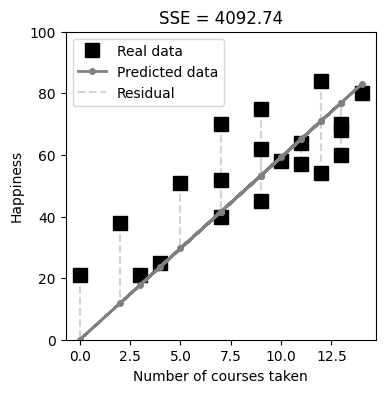

In [15]:
# Least Squares via left-inverse (without intercept)

# compute the left-inverse
design_matrix_leftinv = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T

# solve for coefficients
beta = design_matrix_leftinv @ happiness

# predicted data
pred_happiness = design_matrix @ beta

# Create plot
plt.figure(figsize=(4, 4))
plt.plot(numcourses, happiness, 'ks', markersize=10)
plt.plot(numcourses, pred_happiness, 'o-', color='gray', linewidth=2, markersize=4)

for n, y, yHat in zip(numcourses, happiness, pred_happiness):
    plt.plot([n, n], [y, yHat], '--', color='lightgray', zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('Happiness')
plt.ylim([0,100])
plt.legend(['Real data', 'Predicted data', 'Residual'])
plt.title(f'SSE = {np.sum((pred_happiness - happiness)**2):.2f}')
plt.show()

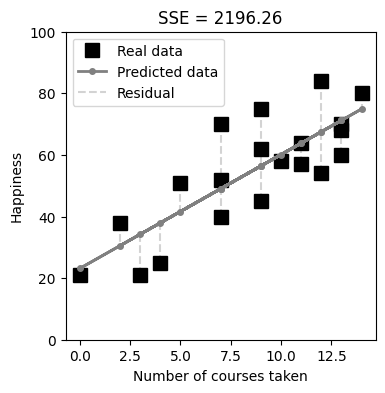

In [16]:
# Least Squares via left-inverse (with intercept)

# Create design matrix with intercept included
design_matrix = np.hstack((np.ones((20, 1)), np.array(numcourses, ndmin=2).T))

# compute the left-inverse
design_matrix_leftinv = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T

# solve for coefficients
beta = design_matrix_leftinv @ happiness

# predicted data
pred_happiness = design_matrix @ beta

# Create plot
plt.figure(figsize=(4, 4))
plt.plot(numcourses, happiness, 'ks', markersize=10)
plt.plot(numcourses, pred_happiness, 'o-', color='gray', linewidth=2, markersize=4)

for n, y, yHat in zip(numcourses, happiness, pred_happiness):
    plt.plot([n, n], [y, yHat], '--', color='lightgray', zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('Happiness')
plt.ylim([0,100])
plt.legend(['Real data', 'Predicted data', 'Residual'])
plt.title(f'SSE = {np.sum((pred_happiness - happiness)**2):.2f}')
plt.show()

# Code Exercises

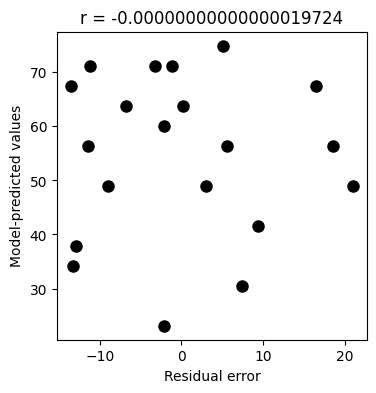

Dot product close to zero: True
Correlation close to zero: True


In [21]:
# Exercise 11-1 (Proving residuals are orthogonal to predictions)

residuals = happiness - pred_happiness


# Create Plot
plt.figure(figsize=(4, 4))
plt.plot(residuals, pred_happiness, 'ko', markersize=8)
plt.xlabel('Residual error')
plt.ylabel('Model-predicted values')
plt.title(f'r = {np.corrcoef(pred_happiness,residuals)[0,1]:.20f}')
plt.show()

# Calculate dot product and correlation
dot_product = np.dot(pred_happiness, residuals)
correlation = np.corrcoef(pred_happiness,residuals)[0,1]

# Check if they are close to zero
dot_product_close_to_zero = np.isclose(dot_product, 0)
correlation_close_to_zero = np.isclose(correlation, 0)

# Print out whether they are close to zero
print(f"Dot product close to zero: {dot_product_close_to_zero}")
print(f"Correlation close to zero: {correlation_close_to_zero}")

In [24]:
# Exercise 11-2 (Proving residuals are orthogonal to entire design matrix subspace)

# Compute the null space
null_space = scipy.linalg.null_space(design_matrix.T)

# Stack the null space on the residuals
stacked_matrix = np.column_stack((null_space, residuals))

# Check if they have the same rank
rank_null_space = np.linalg.matrix_rank(null_space)
rank_stacked = np.linalg.matrix_rank(stacked_matrix)
is_orthogonal = rank_null_space == rank_stacked

print("The residuals are orthogonal to the design matrix subspace:", is_orthogonal) 

The residuals are orthogonal to the design matrix subspace: True


In [48]:
# Exercise 11-3 (Least Squares via QR decomposition)

# Left inverse betas
design_matrix_leftinv = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T
betas_1 = design_matrix_leftinv @ happiness
print("Betas from left-inverse", betas_1)

# Betas from QR
matrix_q, matrix_r = np.linalg.qr(design_matrix)
betas_2 = np.linalg.inv(matrix_r) @ (matrix_q.T @ happiness)
print("Betas from QR with inv(R)", betas_1)

# Betas from QR with back substitution
tmp = (matrix_q.T @ happiness).reshape(-1,1)
matrix_r_augmented = np.hstack((matrix_r, tmp))
matrix_r_augmented_rref = sym.Matrix(matrix_r_augmented).rref()[0]
betas_3 = np.array(matrix_r_augmented_rref[:,-1])
print("Betas from QR with back substitution", betas_3, "\n")

# Print intermediate steps of calculating betas via QR with backsubstitution
print("Matrix R:", matrix_r)
print("Matrix R|Q'y:", matrix_r_augmented)
print("Matrix RREF(R|Q'y):", matrix_r_augmented_rref)

Betas from left-inverse [23.13033815  3.69820606]
Betas from QR with inv(R) [23.13033815  3.69820606]
Betas from QR with back substitution [[23.1303381489125]
 [3.69820606445468]] 

Matrix R: [[ -4.47213595 -38.23676242]
 [  0.          17.7468307 ]]
Matrix R|Q'y: [[  -4.47213595  -38.23676242 -244.84944354]
 [   0.           17.7468307    65.63143693]]
Matrix RREF(R|Q'y): Matrix([[1, 0, 23.1303381489125], [0, 1, 3.69820606445468]])


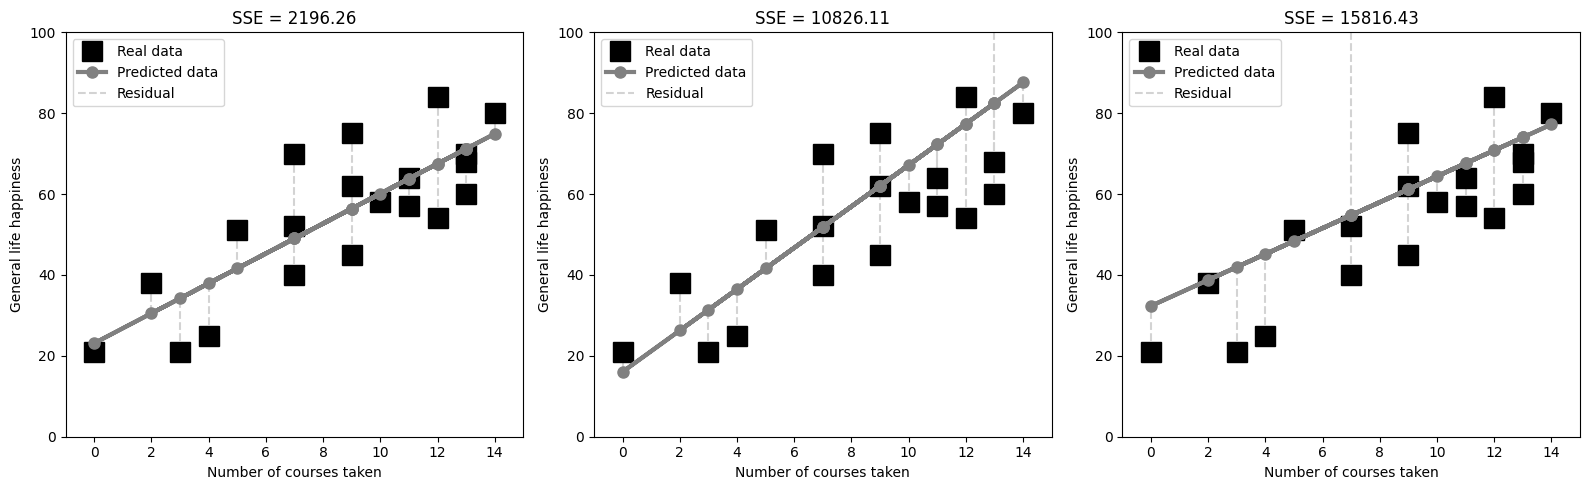

In [51]:
# Exercise 11-4 (Observing the effect of outliers on Least Squares)

# happiness with outliers due to typos (oops!)
happiness_oops1 = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops2 = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]

# Design matrix and its left-inverse (doesn't change with the data)
design_matrix = np.hstack((np.ones((20, 1)), np.array(numcourses, ndmin=2).T))
design_matrix_leftinv = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T

# Create subplots
_, axs = plt.subplots(1, 3, figsize=(16, 5))

for axi, y in zip(axs, [happiness, happiness_oops1, happiness_oops2]):
    # Compute the best-fit parameters
    beta = design_matrix_leftinv @ y

    # Predicted data
    pred_happiness = design_matrix @ beta

    # Plot the data and predicted values
    axi.plot(numcourses, y, 'ks', markersize=15)
    axi.plot(numcourses, pred_happiness, 'o-', color='gray', linewidth=3, markersize=8)

    # Plot the residuals (errors)
    for n, yy, yHat in zip(numcourses, y, pred_happiness):
        axi.plot([n, n], [yy, yHat], '--', color='lightgray', zorder=-10)

    # Make the plot look nicer
    axi.set(xlabel='Number of courses taken', ylabel='General life happiness',
            xlim=[-1, 15], ylim=[0, 100], xticks=range(0, 15, 2))
    axi.legend(['Real data', 'Predicted data', 'Residual'])
    axi.set_title(f'SSE = {np.sum((pred_happiness - y)**2):.2f}')

plt.tight_layout()
plt.show()

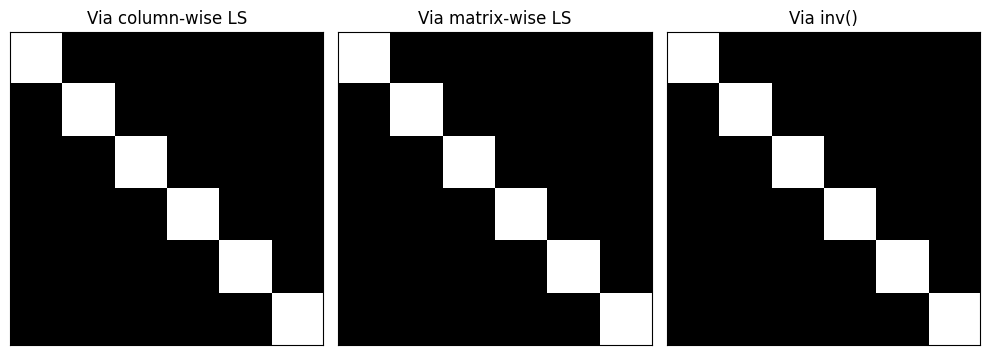

All three methods produce the same result: True


In [57]:
# Exercise 11-5 (Compute Matrix Inverse using Least Squares)

# Matrix size
n = 6

# Some random "design matrix"
design_matrix = np.random.randn(n, n)

# The target matrix (identity)
target_matrix = np.eye(n)

# Find the best-fitting model one column at a time
design_matrix_inv1 = np.zeros_like(design_matrix)
design_matrix_inv_xt_x = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T

for coli in range(n):
    design_matrix_inv1[:, coli] = design_matrix_inv_xt_x @ target_matrix[:, coli]

# Repeat but without a loop
design_matrix_inv2 = design_matrix_inv_xt_x @ target_matrix

# And the inverse using np.inv()
design_matrix_inv3 = np.linalg.inv(design_matrix)

# Create Plot
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
titles = ['Via column-wise LS', 'Via matrix-wise LS', 'Via inv()']
images = [design_matrix_inv1 @ design_matrix, design_matrix_inv2 @ design_matrix, design_matrix_inv3 @ design_matrix]

for ax, img, title in zip(axs, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set(xticks=[], yticks=[])

plt.tight_layout()
plt.show()

# Compare the results of the three methods
check = np.allclose(design_matrix_inv1 @ design_matrix, design_matrix_inv2 @ design_matrix, design_matrix_inv3 @ design_matrix)
print("All three methods produce the same result:", check)